In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### load dataset

In [3]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [4]:
house_data.columns

Index(['Date', 'Time', 'DateTime', 'System Setting', 'System Mode',
       'Calendar Event', 'Program Mode', 'Cool Set Temp (C)',
       'Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)',
       'Outdoor Temp (C)', 'Wind Speed (km/h)', 'Cool Stage 1 (sec)',
       'Heat Stage 1 (sec)', 'Fan (sec)', 'Thermostat Temperature (C)',
       'Thermostat Humidity (%RH)', 'Thermostat Motion', 'Bedroom (C)',
       'Bedroom2', '3rd floor landing (C)', '3rd floor landing2',
       '3rd floor room (C)', '3rd floor room2', 'Basement (C)', 'Basement2'],
      dtype='object')

In [1]:
#### selected features

In [5]:
selected_house_data=house_data[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)","Heat Stage 1 (sec)"]]
selected_house_data

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
0,21.0,21.3,5.0,30.0,0.0
1,21.0,21.1,5.0,32.0,0.0
2,21.0,20.9,5.2,32.0,0.0
3,21.0,20.7,5.2,33.0,135.0
4,21.0,20.6,5.2,33.0,300.0
...,...,...,...,...,...
29671,21.0,21.2,15.2,21.0,0.0
29672,21.0,21.1,15.7,21.0,0.0
29673,21.0,21.1,15.7,21.0,0.0
29674,21.0,21.1,15.7,21.0,0.0


In [2]:
#### show the target variable distribution

In [9]:
x = selected_house_data["Heat Stage 1 (sec)"].value_counts().index
y = selected_house_data["Heat Stage 1 (sec)"].value_counts(normalize = True).values

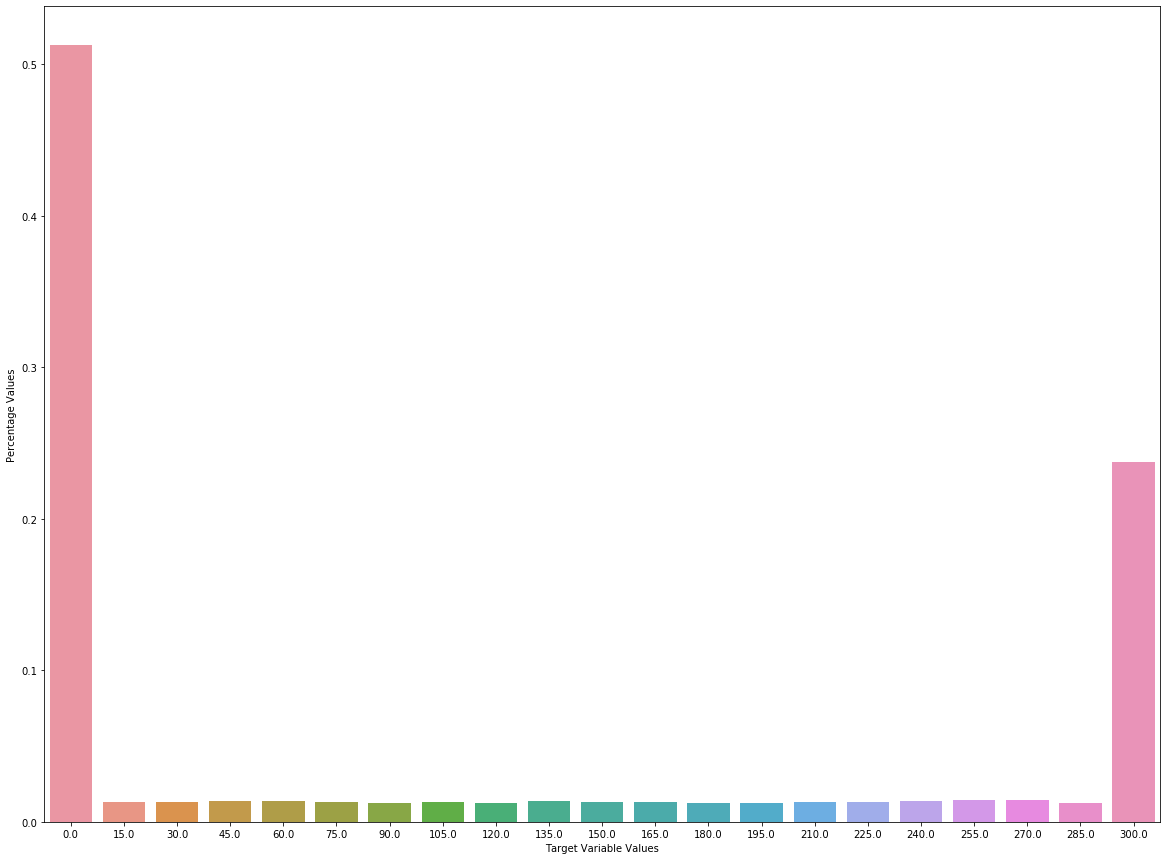

In [14]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x,y )
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')
plt.savefig("1.png")

[Text(0.5, 0, 'Target Variable Values')]

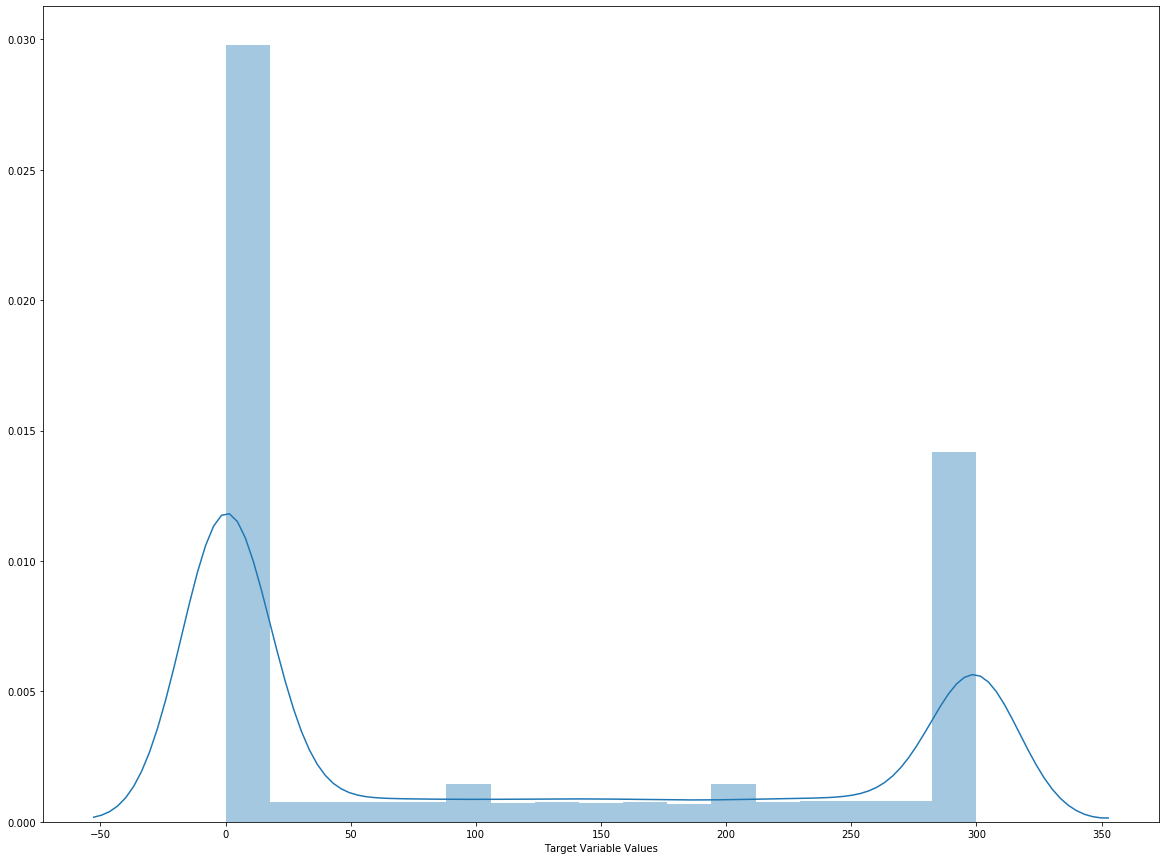

In [15]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(selected_house_data["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')

####  Approach a: use 24 hours average value as the target values.

In [25]:
step = 24
df2 = pd.DataFrame()
for i in range(house_data.shape[0]-step):
    dummy= pd.DataFrame(selected_house_data.iloc[range(i,i+step)].sum()).T
    dummy = dummy/step
    if i ==0:
        df2 = dummy.copy()
    else:
        df2 = df2.append(dummy, ignore_index = True)

In [26]:
df2.head()

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
0,21.0,20.883333,5.275000,32.791667,102.500
1,21.0,20.875000,5.287500,32.916667,102.500
2,21.0,20.870833,5.300000,32.958333,102.500
3,21.0,20.870833,5.308333,33.000000,102.500
4,21.0,20.875000,5.316667,33.000000,96.875


#### check new target variables distribution

In [6]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(df2["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')
plt.savefig("2.png")

NameError: name 'plt' is not defined

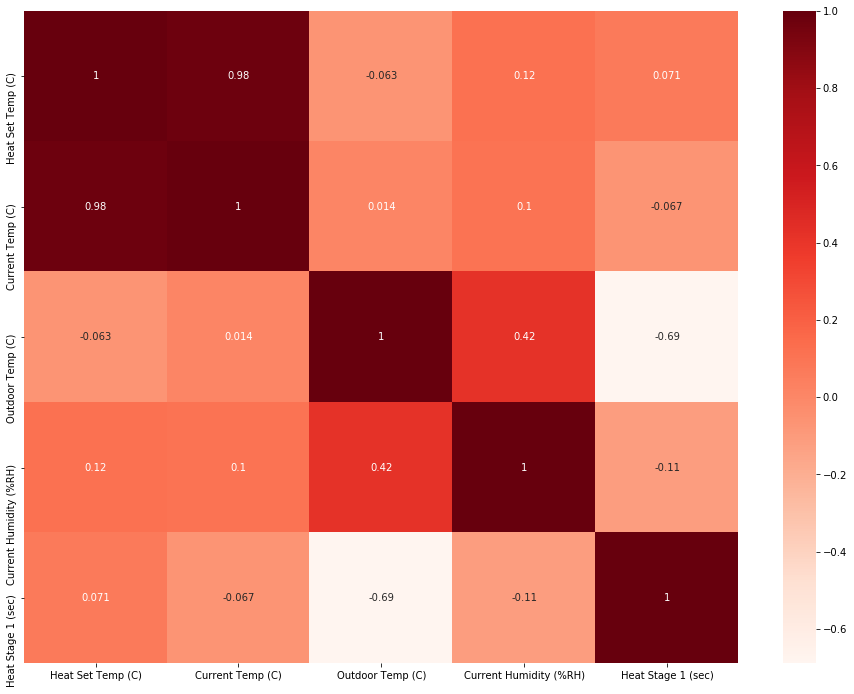

In [28]:
plt.figure(figsize = (16,12))
cor = df2.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

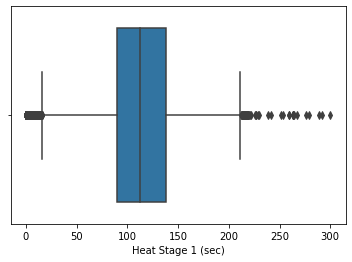

In [30]:
sns.boxplot(df2["Heat Stage 1 (sec)"])

#### check outliar, and remove the outliar records

In [34]:
Q1 = df2["Heat Stage 1 (sec)"].quantile(0.25)
Q3 = df2["Heat Stage 1 (sec)"].quantile(0.75)
IQR = Q3 - Q1
IQR

48.75

In [35]:
df2[(df2["Heat Stage 1 (sec)"]< (Q1 - 1.5 * IQR)) |(df2["Heat Stage 1 (sec)"] > (Q3 + 1.5 * IQR)) ]

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
272,21.0,20.900000,5.1500,33.000000,12.5
273,21.0,20.900000,5.2375,33.000000,0.0
274,21.0,20.891667,5.3250,33.000000,0.0
275,21.0,20.879167,5.4125,33.000000,0.0
276,21.0,20.866667,5.5000,33.000000,0.0
...,...,...,...,...,...
29647,21.0,21.354167,14.5000,23.458333,0.0
29648,21.0,21.350000,14.6000,23.375000,0.0
29649,21.0,21.341667,14.6750,23.333333,0.0
29650,21.0,21.333333,14.7500,23.250000,0.0


#### check z-score, and based z-score, select z-score < 3 records

In [47]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df2))
z

array([[0.09694058, 0.1813753 , 1.44925885, 2.1479446 , 0.13601699],
       [0.09694058, 0.1649261 , 1.45161046, 2.17966708, 0.13601699],
       [0.09694058, 0.1567015 , 1.45396208, 2.19024124, 0.13601699],
       ...,
       [0.09694058, 1.08608137, 3.21767155, 0.25238939, 2.39199277],
       [0.09694058, 1.06963217, 3.23178123, 0.27353771, 2.39199277],
       [0.09694058, 1.05318297, 3.24589091, 0.30526018, 2.39199277]])

In [51]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR

Heat Set Temp (C)          0.000000
Current Temp (C)           0.029167
Outdoor Temp (C)           6.833333
Current Humidity (%RH)     7.000000
Heat Stage 1 (sec)        48.750000
dtype: float64

In [64]:
df2_o = df2[(z < 3).all(axis=1)]
df2_o

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
0,21.0,20.883333,5.275,32.791667,102.5
0,21.0,20.883333,5.275,32.791667,102.5
0,21.0,20.883333,5.275,32.791667,102.5
0,21.0,20.883333,5.275,32.791667,102.5
0,21.0,20.883333,5.275,32.791667,102.5
...,...,...,...,...,...
29650,21.0,21.333333,14.750,23.250000,0.0
29651,21.0,21.325000,14.825,23.125000,0.0
29651,21.0,21.325000,14.825,23.125000,0.0
29651,21.0,21.325000,14.825,23.125000,0.0


In [ ]:
df2_o.shape

In [68]:
df2_out = df2[((df2 > (Q1 - 1.5 * IQR)) & (df2 < (Q3 + 1.5 * IQR))).any(axis = 1)]
df2_out.shape

(29652, 5)

In [69]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split


#### check target value distribution after above action

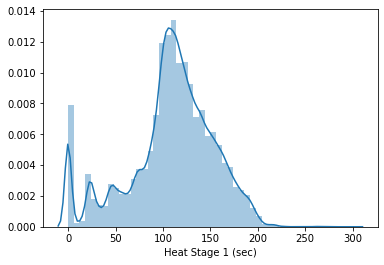

In [70]:
sns.distplot(df2_o["Heat Stage 1 (sec)"])
plt.savefig("3.png")

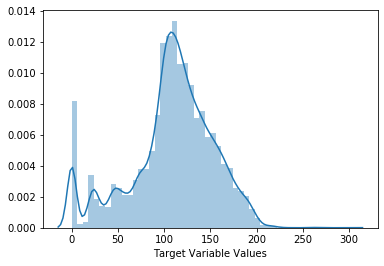

In [71]:
ax = sns.distplot(df2_out["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')
plt.savefig("4.png")

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df2_out

#### select X and y variable

In [73]:
X = df2_out[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)"]]
y = df2_out[["Heat Stage 1 (sec)"]]

#### split whole dataset to train and test dataset

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### ANN model

In [77]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 16, epochs = 200, shuffle = True)

Epoch 1/200
1483/1483 [==============================] - 3s 2ms/step - loss: 38.4898 - mse: 3182.3059 - val_loss: 21.6278 - val_mse: 1128.5638
Epoch 2/200
1483/1483 [==============================] - 2s 2ms/step - loss: 21.4994 - mse: 1080.1228 - val_loss: 21.6574 - val_mse: 1141.9193
Epoch 3/200
1483/1483 [==============================] - 3s 2ms/step - loss: 21.4869 - mse: 1078.8179 - val_loss: 21.6272 - val_mse: 1133.3030
Epoch 4/200
1483/1483 [==============================] - 3s 2ms/step - loss: 21.4867 - mse: 1077.0879 - val_loss: 21.5681 - val_mse: 1110.7704
Epoch 5/200
1483/1483 [==============================] - 4s 2ms/step - loss: 21.4877 - mse: 1075.5592 - val_loss: 21.6272 - val_mse: 1132.2355
Epoch 6/200
1483/1483 [==============================] - 2s 2ms/step - loss: 21.4721 - mse: 1073.4211 - val_loss: 21.6162 - val_mse: 1130.1582
Epoch 7/200
1483/1483 [==============================] - 3s 2ms/step - loss: 21.4497 - mse: 1071.9583 - val_loss: 21.5771 - val_mse: 1117.0518

Epoch 58/200
1483/1483 [==============================] - 2s 2ms/step - loss: 21.0322 - mse: 1054.6075 - val_loss: 21.2079 - val_mse: 1077.4471
Epoch 59/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0167 - mse: 1052.0254 - val_loss: 21.1671 - val_mse: 1084.6692
Epoch 60/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0165 - mse: 1051.8657 - val_loss: 21.1911 - val_mse: 1071.1031
Epoch 61/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0257 - mse: 1053.3776 - val_loss: 21.1663 - val_mse: 1081.5460
Epoch 62/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0075 - mse: 1052.6924 - val_loss: 21.2497 - val_mse: 1117.9600
Epoch 63/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0183 - mse: 1053.7057 - val_loss: 21.1735 - val_mse: 1084.3187
Epoch 64/200
1483/1483 [==============================] - 2s 1ms/step - loss: 21.0105 - mse: 1053.0232 - val_loss: 21.3978 - val_mse: 11

Epoch 115/200
1483/1483 [==============================] - 2s 2ms/step - loss: 20.8505 - mse: 1037.5332 - val_loss: 21.0276 - val_mse: 1095.7650
Epoch 116/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.8569 - mse: 1039.6584 - val_loss: 20.9583 - val_mse: 1070.7292
Epoch 117/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.8470 - mse: 1038.9215 - val_loss: 20.9899 - val_mse: 1068.4818
Epoch 118/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.8453 - mse: 1039.0513 - val_loss: 20.9577 - val_mse: 1065.1697
Epoch 119/200
1483/1483 [==============================] - 2s 2ms/step - loss: 20.8573 - mse: 1040.5684 - val_loss: 20.9923 - val_mse: 1062.2488
Epoch 120/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.8543 - mse: 1038.9202 - val_loss: 20.9898 - val_mse: 1083.4911
Epoch 121/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.8438 - mse: 1039.1652 - val_loss: 21.0184 - val_

Epoch 169/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7754 - mse: 1019.3737 - val_loss: 20.9578 - val_mse: 1090.4418
Epoch 170/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7956 - mse: 1023.3490 - val_loss: 20.9371 - val_mse: 1076.6238
Epoch 171/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7800 - mse: 1020.0587 - val_loss: 21.0716 - val_mse: 1036.3102
Epoch 172/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7826 - mse: 1023.9268 - val_loss: 21.0140 - val_mse: 1095.5059
Epoch 173/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7605 - mse: 1022.2852 - val_loss: 20.9834 - val_mse: 1087.7543
Epoch 174/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7676 - mse: 1019.8539 - val_loss: 21.0591 - val_mse: 1031.2567
Epoch 175/200
1483/1483 [==============================] - 2s 1ms/step - loss: 20.7601 - mse: 1020.4346 - val_loss: 20.9306 - val_

#### train history of train loss change amd val_loss change

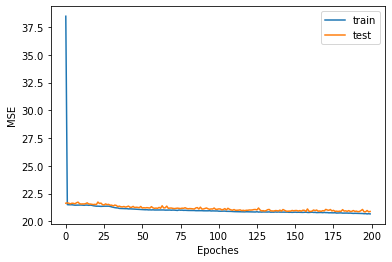

In [78]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

plt.xlabel("Epoches")
plt.ylabel("MSE")
plt.savefig("5.png")
plt.show()

In [79]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [80]:
y_predicted = classifier.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_error,f1_score

In [82]:
mean_absolute_error(y_test, y_predicted)

20.88217675796429

## Approch(2)

In [83]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

#### fill missing data with value before it

In [84]:
house_data = house_data.fillna(method = "bfill")

In [85]:
house_data.isnull().sum()

Date                              0
Time                              0
DateTime                          0
System Setting                    0
System Mode                       0
Calendar Event                29548
Program Mode                      0
Cool Set Temp (C)                 0
Heat Set Temp (C)                 0
Current Temp (C)                  0
Current Humidity (%RH)            0
Outdoor Temp (C)                  0
Wind Speed (km/h)                 0
Cool Stage 1 (sec)                0
Heat Stage 1 (sec)                0
Fan (sec)                         0
Thermostat Temperature (C)        0
Thermostat Humidity (%RH)         0
Thermostat Motion                 0
Bedroom (C)                       0
Bedroom2                          0
3rd floor landing (C)             0
3rd floor landing2                0
3rd floor room (C)                0
3rd floor room2                   0
Basement (C)                      0
Basement2                         0
dtype: int64

#### selected features

In [89]:
numerical_vars = ['Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)', 'Outdoor Temp (C)','Thermostat Temperature (C)', 'Thermostat Humidity (%RH)']
sc = StandardScaler()
sc.fit(house_data[numerical_vars])
scalar_data = sc.transform(house_data[numerical_vars])

##### use one-hot encoder the target variable, simplely,convert decimal to binary, and each bit is a target variable, so every target has  0 or 1, no inbanlance.

In [90]:
y_auxHeat = house_data['Heat Stage 1 (sec)'].to_numpy()
oe = OrdinalEncoder()
y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))

#### build new dataset

In [91]:
scaler_house_data = house_data[numerical_vars].copy()
scaler_house_data[numerical_vars] = scalar_data
scaler_house_data["Heat Stage 1"] = y_auxHeat

In [92]:
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0.0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0.0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0.0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9.0
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20.0
...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0.0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0.0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0.0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0.0


In [93]:
from tensorflow.keras.utils import to_categorical

X = scaler_house_data[numerical_vars]
y = to_categorical(scaler_house_data[["Heat Stage 1"]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
X_train = X_train.values
X_test = X_test.values
y_train.shape

(23740, 21)

In [95]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 20, shuffle = True)

Epoch 1/20
2374/2374 [==============================] - 7s 3ms/step - loss: 1.4840 - accuracy: 0.6727 - val_loss: 1.3479 - val_accuracy: 0.7084
Epoch 2/20
2374/2374 [==============================] - 4s 2ms/step - loss: 1.3629 - accuracy: 0.7019 - val_loss: 1.3359 - val_accuracy: 0.7099
Epoch 3/20
2374/2374 [==============================] - 4s 2ms/step - loss: 1.3500 - accuracy: 0.7023 - val_loss: 1.3219 - val_accuracy: 0.7092
Epoch 4/20
2374/2374 [==============================] - 3s 1ms/step - loss: 1.3406 - accuracy: 0.7019 - val_loss: 1.3148 - val_accuracy: 0.7089
Epoch 5/20
2374/2374 [==============================] - 3s 1ms/step - loss: 1.3299 - accuracy: 0.7023 - val_loss: 1.3059 - val_accuracy: 0.7086
Epoch 6/20
2374/2374 [==============================] - 3s 1ms/step - loss: 1.3218 - accuracy: 0.7017 - val_loss: 1.3094 - val_accuracy: 0.7091
Epoch 7/20
2374/2374 [==============================] - 3s 1ms/step - loss: 1.3178 - accuracy: 0.7021 - val_loss: 1.2958 - val_accuracy:

In [ ]:
classifier.summary()

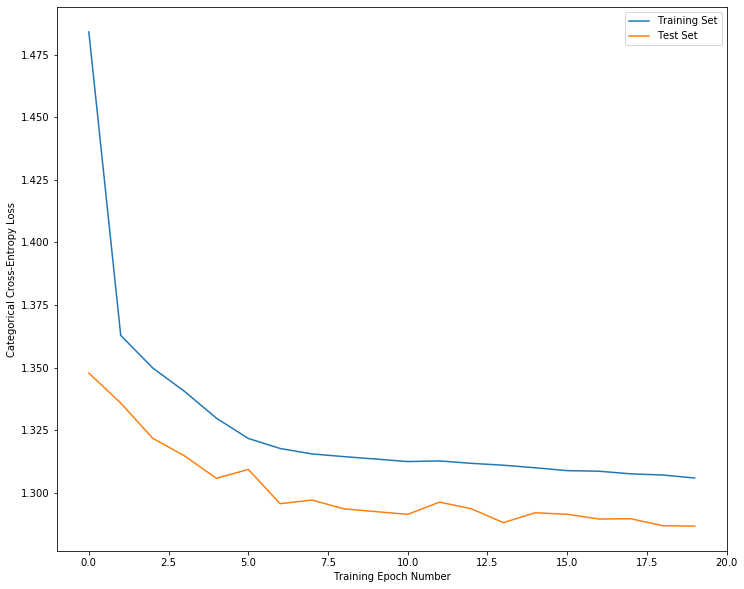

In [96]:
plt.figure(figsize = (12, 10))
plt.plot(history.history['loss'], label = 'Training Set')
plt.plot(history.history['val_loss'], label = 'Test Set')
plt.legend()
plt.xlabel("Training Epoch Number")
plt.ylabel("Categorical Cross-Entropy Loss")
plt.xlim((-1, 20))
plt.savefig("6.png")
plt.show()

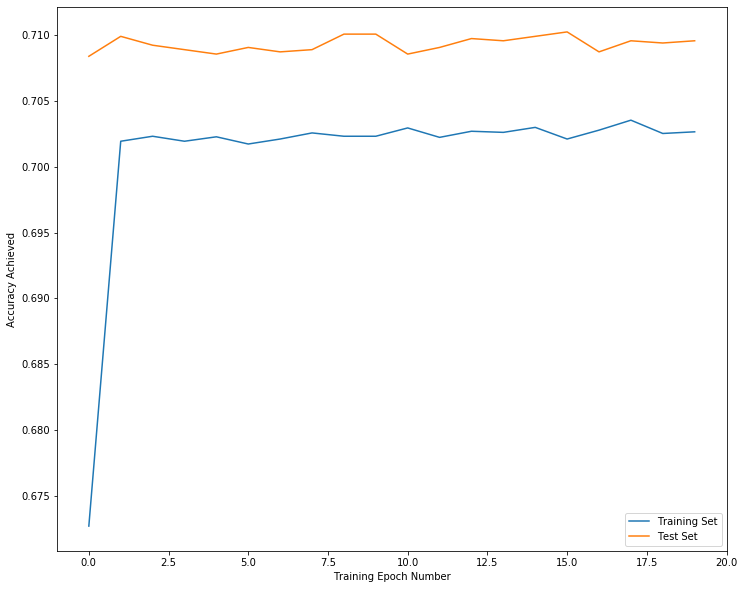

In [97]:
plt.figure(figsize = (12, 10))
plt.plot(history.history['accuracy'], label = 'Training Set')
plt.plot(history.history['val_accuracy'], label = 'Test Set')
plt.legend()
plt.xlabel("Training Epoch Number")
plt.ylabel("Accuracy Achieved")
plt.xlim((-1, 20))
plt.savefig("7.png")
plt.show()

In [99]:
y_predicted = classifier.predict(X_test)
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([20, 20,  0, ...,  0, 20, 20], dtype=int64)

In [100]:
y_test = np.argmax(y_test, axis = 1)


In [101]:
y_test

array([20, 10,  0, ...,  0, 12, 14], dtype=int64)

In [102]:
import plotly.figure_factory as ff
import plotly.io as pio

In [107]:
cm = confusion_matrix(y_test, y_predicted)
cfm_n = np.flipud(cm)
cfm_n = cfm_n.astype('float') / cfm_n.sum(axis=1)[:, np.newaxis]

z = np.round(cfm_n, 2)
x = [str(i) for i in range(z.shape[0],0,-1)]
y = [str(i) for i in range(z.shape[1])]
# y = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

# x = ['20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']



In [110]:
fig = ff.create_annotated_heatmap(z, x = x, y = y, annotation_text = z, colorscale = 'deep')
fig.update_layout(width = 800, height = 800, xaxis_showgrid = False, yaxis_showgrid = False, template = 'none')
fig.update_layout(title = {'text': "",
                           'y':0.95,
                           'x':0.47,
                           'xanchor': 'center',
                           'yanchor': 'top'}, 
                  xaxis_title = 'Predicted Labels',
                  yaxis_title = 'True Labels')
fig['layout']['xaxis']['side'] = 'bottom'

fig.show()

In [120]:
test_sum = sum(y_test)*15
test_sum

638295

In [119]:
predicted_sum = sum(y_predicted)*15
predicted_sum

551400

In [121]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 13.613611261250675 %


In [122]:
f1_score(y_test, y_predicted, average = 'weighted')

0.6104208261327043

In [123]:
mean_absolute_error(y_test, y_predicted)

3.0190363881401616

In [124]:
accuracy_score(y_test, y_predicted)

0.7095687331536388

In [125]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)
y_train_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.6011189044057155

In [127]:
accuracy_score(y_train, y_train_predicted)

0.7024431339511373

In [128]:
mean_absolute_error(y_train, y_train_predicted)

3.075568660488627